# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
X_test = pd.read_csv('X_test_cs.csv')
X_train = pd.read_csv('X_train_balanced_cs.csv')
y_test = pd.read_csv('y_test_cs.csv')
y_train = pd.read_csv('y_train_balanced_cs.csv')

In [3]:
X_test

,Age,Income,Number of Children,Gender_Male,Education_encoded,Marital Status_Single,Home Ownership_Rented
0,25,55000.0,0,0,1,1,1
1,48,87500.0,1,0,2,0,0
2,26,55000.0,1,0,1,0,0
3,39,62500.0,2,0,1,0,0
4,35,90000.0,1,0,2,0,0
5,25,55000.0,0,0,1,1,1
6,48,82500.0,1,0,2,0,0
7,48,82500.0,1,0,2,0,0
8,36,95000.0,2,0,4,0,0
9,36,95000.0,1,0,3,0,0


In [4]:
y_test

,Credit Score_ordinal_encoded
0,1
1,2
2,1
3,2
4,2
5,1
6,2
7,2
8,2
9,2


In [5]:
X_train

,Age,Income,Number of Children,Gender_Male,Education_encoded,Marital Status_Single,Home Ownership_Rented
0,26,45000.000000,0,0,0,1,1
1,29,27500.000000,0,0,3,1,1
2,25,62500.000000,0,0,1,1,1
3,29,68000.000000,2,0,2,0,0
4,31,65000.000000,0,1,1,1,1
...,...,...,...,...,...,...,...
247,29,43703.466973,0,0,0,1,1
248,34,47500.000000,0,1,0,1,1
249,29,57500.000000,0,0,0,1,1
250,25,60063.547817,0,0,1,1,1


In [6]:
y_train

,Credit Score_ordinal_encoded
0,1
1,0
2,1
3,1
4,1
...,...
247,1
248,1
249,1
250,1


In [12]:
contagem = y_train.value_counts()
print('Contagem de amostrar por classe:', contagem)

Contagem de amostrar por classe: Credit Score_ordinal_encoded
0                               84
1                               84
2                               84
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

1º Coleta, limpeza e tratamento de dados  
2º Divisão da base em treino e teste  
3º Construção do algoritmo de treino  
4º Aplicação do modelo à base de teste e avaliação dos resultados — uso do `classification_report`, com *precision*, *recall*, *f1-score* e matriz de confusão  
5º Aprimoramento do modelo — avaliação das principais *features* e teste de desempenho utilizando apenas as mais relevantes


# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [14]:
from sklearn.tree import DecisionTreeClassifier
arvore_cs = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_cs.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
from sklearn.metrics import accuracy_score, classification_report
previsoes_train = arvore_cs.predict(X_train)
acuracia_train = accuracy_score(y_train, previsoes_train)
print('Acurácia:', acuracia_train)

Acurácia: 1.0


Uma acurácia excelente para os dados de treino, é importante observar a matriz de confusão.

In [19]:
conf_matrix = confusion_matrix(y_train, previsoes_train)

conf_matrix

array([[84,  0,  0],
       [ 0, 84,  0],
       [ 0,  0, 84]], dtype=int64)

A matriz de confusão demonstra ausência de falsos positivos e falsos negativos.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [16]:
previsoes_test = arvore_cs.predict(X_test)
acuracia_test = accuracy_score(y_test, previsoes_test)
print('Acurácia:', acuracia_test)

Acurácia: 0.975609756097561


Nos dados de teste obteve-se uma acurácia inferior ao dos dados de treino, porém, ainda sim, uma acurácia extremamente alta.

In [21]:
conf_matrix = confusion_matrix(y_test, previsoes_test)

conf_matrix

array([[ 6,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 28]], dtype=int64)

Observa-se que apenas um valor foi previsto errado.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

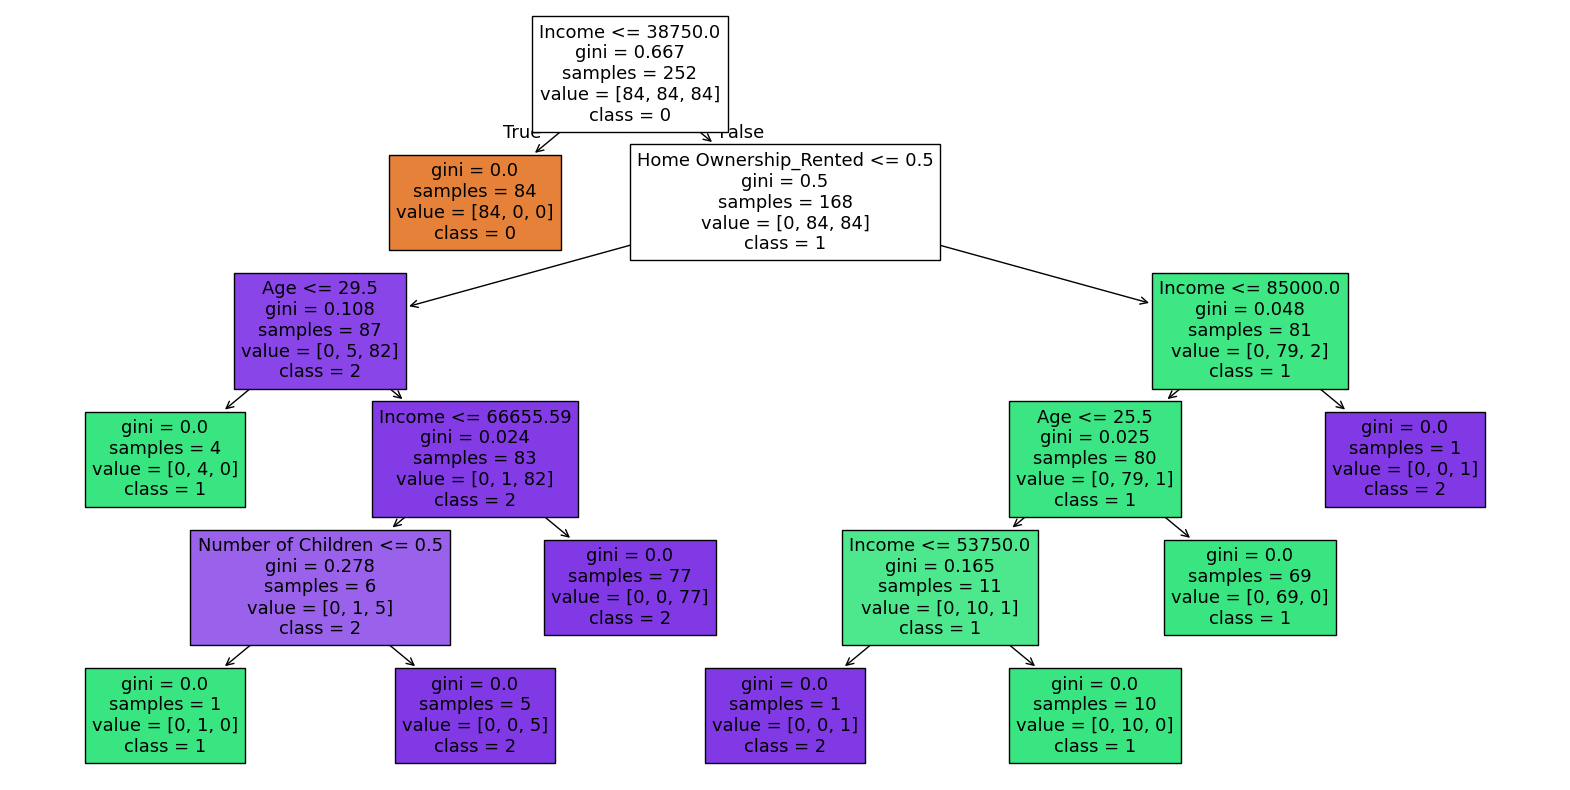

In [23]:
plt.figure(figsize=(20,10))
plot_tree(arvore_cs, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2'])
plt.show()

Sim, é possível fazer uma avaliação visual e observar que as principais features do modelo são Income e Home Ownership.

In [25]:
profundidade = arvore_cs.get_depth()
print(f"A profundidade da árvore é: {profundidade}")

A profundidade da árvore é: 5


# 6) Identifique as 2 principais features do modelo.


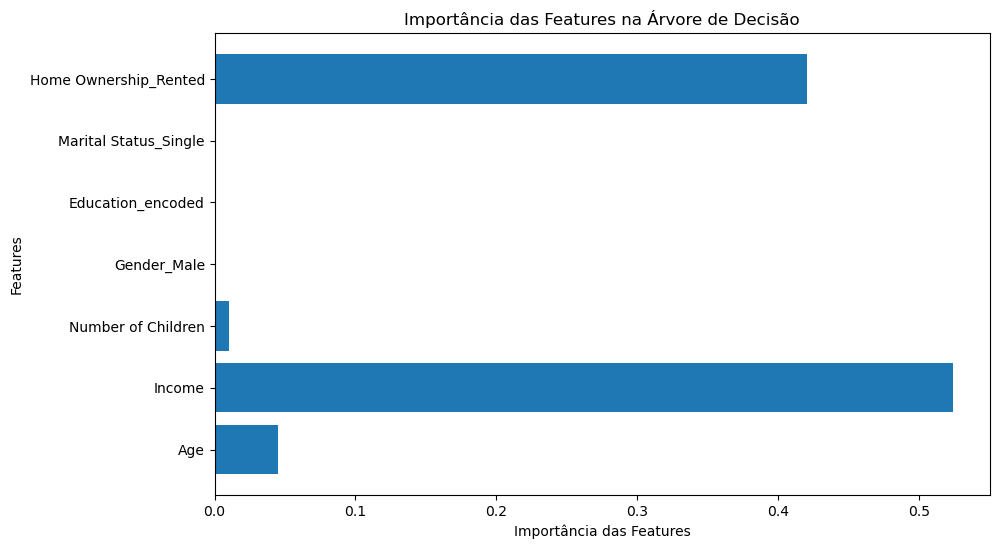

In [26]:
importancias_features = arvore_cs.feature_importances_
nomes_features = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

O gráfico de barras comprova o que tínhamos observado na questão anterior, de que Income e Home Ownership são as duas principais features.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [28]:
X_train_reduzido = X_train[['Income', 'Home Ownership_Rented']]
X_test_reduzido = X_test[['Income', 'Home Ownership_Rented']]

In [29]:
arvore_cs_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_cs_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
previsoes_test_reduzido = arvore_cs_reduzido.predict(X_test_reduzido)

In [33]:
previsoes_test_reduzido = arvore_cs_reduzido.predict(X_test_reduzido)
acuracia_test_reduzido = accuracy_score(y_test, previsoes_test_reduzido)
print('Acurácia com modelo reduzido:', acuracia_test_reduzido)

Acurácia com modelo reduzido: 0.9512195121951219


In [35]:
conf_matrix = confusion_matrix(y_test, previsoes_test_reduzido)

conf_matrix

array([[ 6,  0,  0],
       [ 0,  5,  1],
       [ 0,  1, 28]], dtype=int64)

No modelo apenas com as 2 principais features obteve-se uma acurácia menor.

A matriz de confusão apresenta que o novo modelo teve 2 erros, ao invés de somente um no primeiro modelo

Vamos avaliar o classification report do modelo com todas as features e somente com as duas principais.

In [37]:
relatorio = classification_report(y_test, previsoes_test)
print("Relatório de Classificação Com Todas as Features:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      1.00      0.92         6
           2       1.00      0.97      0.98        29

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



In [36]:
relatorio = classification_report(y_test, previsoes_test_reduzido)
print("Relatório de Classificação Apenas Com Income e Home Ownership:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



A partir da análise, conclue-se que o desempenho do modelo com apenas as duas principais é inferior ao modelo com todas as variáveis.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [ ]:
# Ambos os modelos obtiveram uma acurácia = 0,975609756097561 e erraram somente um dos valores previstos.
# Portanto, pode-se argumentar que os dois modelos indicam uma boa capacidade de generalização e se adequam muito bem aos dados.